In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
X_train = pd.read_csv("data-train.csv",index_col=0)
X_train.drop(['sales'],axis=1)
Y_train = X_train.sales

In [4]:
best_ccp_alpha = 0.005
best_n_est = 100
best_lr=0.1
best_min_ss=0.02

In [5]:
Model = GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [6]:

RG1 = Model
RG1.fit(X_train,Y_train.values.ravel())

GradientBoostingRegressor(ccp_alpha=0.005, min_samples_split=0.02)

In [7]:
MSE(RG1.predict(X_train),Y_train)

0.10609681062080865

In [11]:
result = pd.DataFrame(Y_train)


In [12]:
result["Predicted_sales"] = RG1.predict(X_train)

In [13]:
MSE(result["sales"],result["Predicted_sales"])

0.10609681062080865

In [14]:
residual = result['sales']-result['Predicted_sales']

In [15]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

In [16]:
import scipy.stats as sct

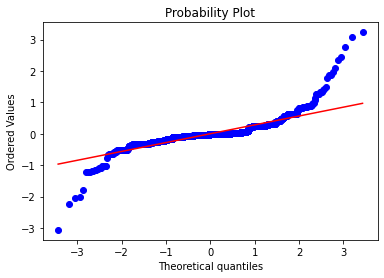

In [17]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [18]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

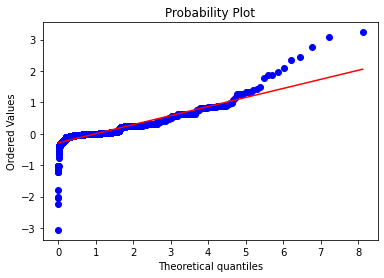

In [19]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [20]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

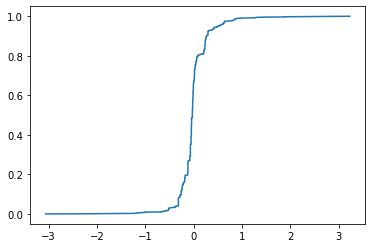

In [21]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

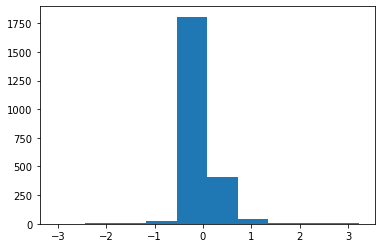

In [22]:
plt.hist(Sample)
plt.show()

In [23]:
def inv(sample,jump,area):
    size = len(sample)
    temp=0
    i=0
    while temp<area:
        temp=jump[i]
        i+=1
    return sample[i]

In [24]:
offset = inv(Sample,jumps,2/3)
offset

0.0020028993745739854

In [25]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

In [26]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

449664

In [27]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [28]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

441864.0

In [29]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

422788.0

In [30]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

443220.0

In [31]:
result.to_csv(".\\Model_Prediction\\2_Gradient_Boosting.csv")